<a href="https://colab.research.google.com/github/EsraaMosaad/ASDC-AI-Data-analysis-internship/blob/main/Task_2_102_Category_Flower_Dataset_(pretrained).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import argmax
import cv2
import os
import glob
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Load dataset**

In [ ]:
!tar -xvzf /content/drive/MyDrive/Dataset/102flowers.tgz

Streaming output truncated to the last 5000 lines.
jpg/image_02266.jpg
jpg/image_00062.jpg
jpg/image_05821.jpg
jpg/image_03712.jpg
jpg/image_01142.jpg
jpg/image_03033.jpg
jpg/image_05760.jpg
jpg/image_02732.jpg
jpg/image_00183.jpg
jpg/image_05264.jpg
jpg/image_03778.jpg
jpg/image_07061.jpg
jpg/image_04468.jpg
jpg/image_00676.jpg
jpg/image_07610.jpg
jpg/image_02192.jpg
jpg/image_05112.jpg
jpg/image_05638.jpg
jpg/image_00053.jpg
jpg/image_02451.jpg
jpg/image_05857.jpg
jpg/image_08033.jpg
jpg/image_03902.jpg
jpg/image_07494.jpg
jpg/image_02357.jpg
jpg/image_05496.jpg
jpg/image_04496.jpg
jpg/image_07538.jpg
jpg/image_01801.jpg
jpg/image_00326.jpg
jpg/image_07644.jpg
jpg/image_01199.jpg
jpg/image_01168.jpg
jpg/image_07020.jpg
jpg/image_05006.jpg
jpg/image_03484.jpg
jpg/image_02825.jpg
jpg/image_04549.jpg
jpg/image_02011.jpg
jpg/image_04360.jpg
jpg/image_06847.jpg
jpg/image_07695.jpg
jpg/image_03540.jpg
jpg/image_08058.jpg
jpg/image_01230.jpg
jpg/image_00096.jpg
jpg/image_01517.jpg
jpg/image

**The size of the iamge is not the same so i we are going to resize all the image with the same size.**

In [ ]:
file = '/content/jpg/*'
dim = (150, 150)

def resize_image(image_path):
    return cv2.resize(cv2.imread(image_path), dim, interpolation=cv2.INTER_AREA)

image_paths = glob.glob(file)
# data_images = [cv2.imread(image_path) for image_path in image_paths]
data_images = [resize_image(image) for image in image_paths[0:5000]]

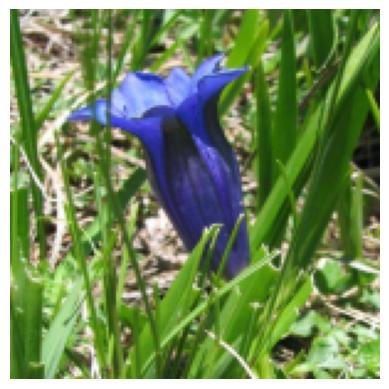

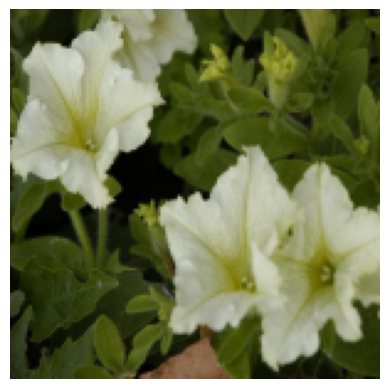

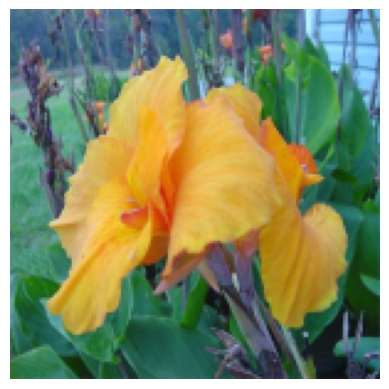

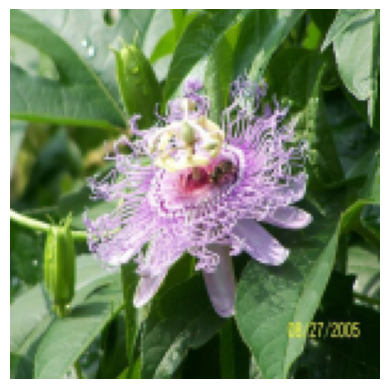

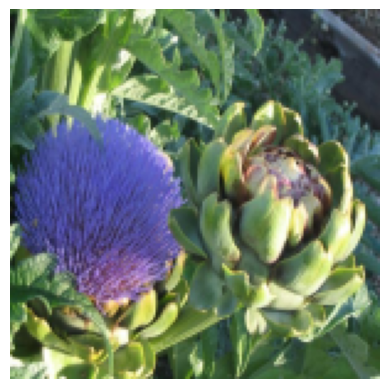

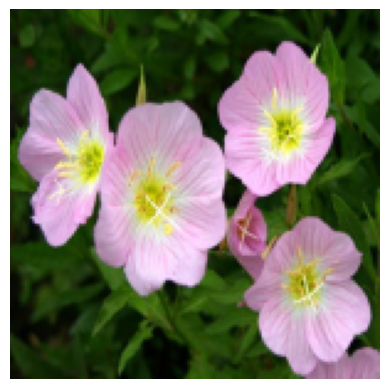

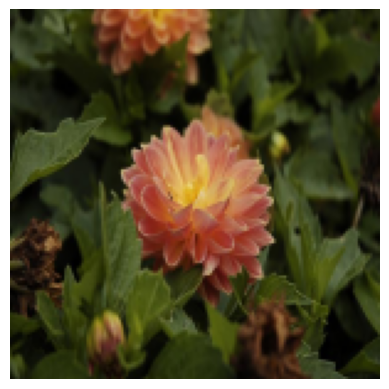

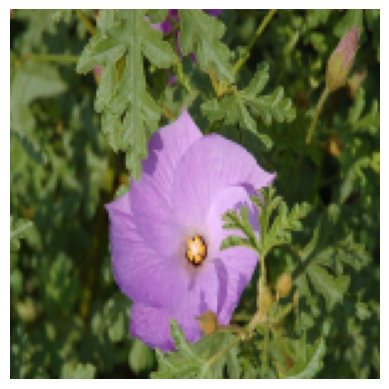

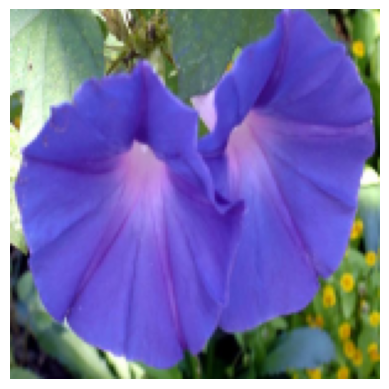

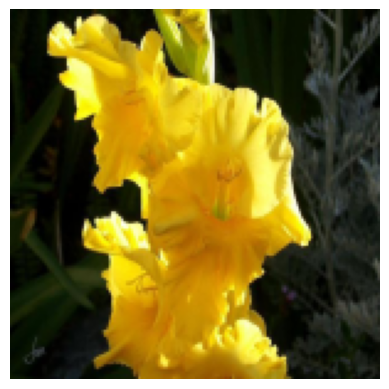

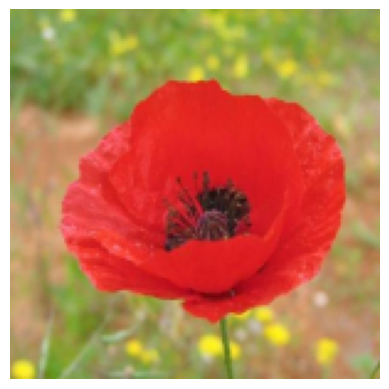

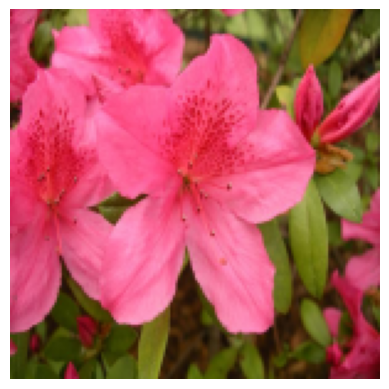

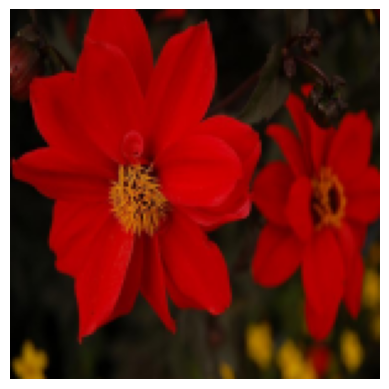

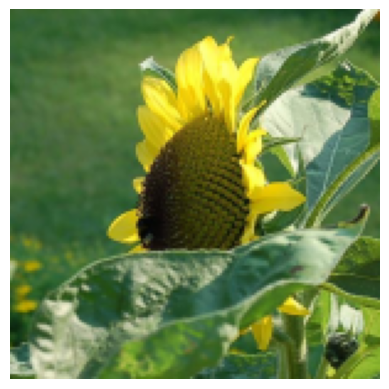

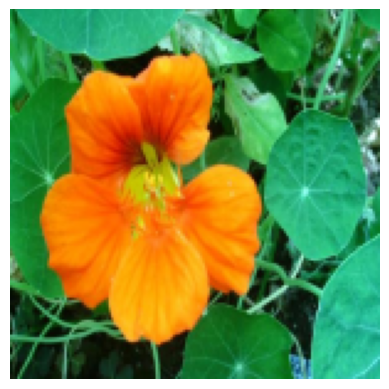

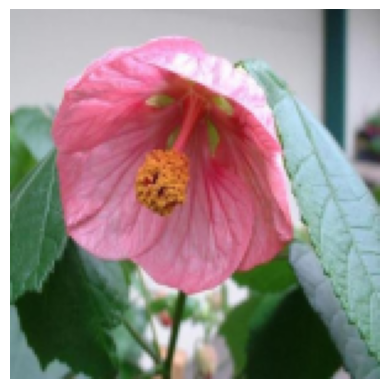

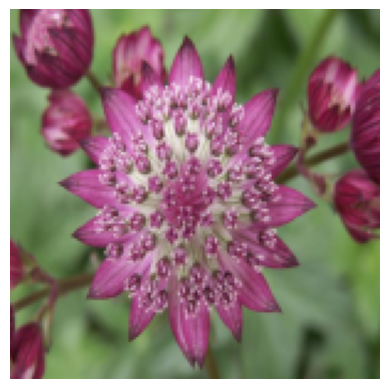

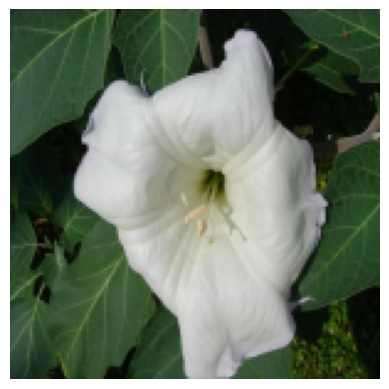

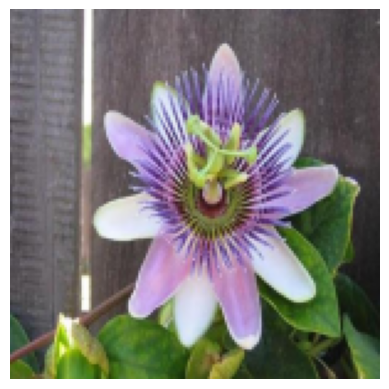

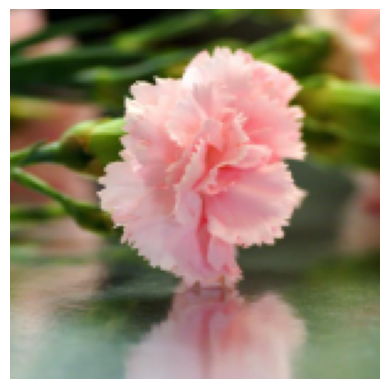

In [ ]:
# plt.subplot(10, 2, 5)
for i in range(20):
    plt.imshow(cv2.cvtColor(data_images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



In [ ]:
import scipy.io
label_image = scipy.io.loadmat("/content/drive/MyDrive/Dataset/imagelabels.mat")

In [ ]:
label_image['labels'].shape

(1, 8189)

In [ ]:
label=label_image['labels'].reshape((-1,1))
label.shape

(8189, 1)

In [ ]:
data_array = np.array(data_images)

In [ ]:
del data_images

In [ ]:
data_array.shape

(5000, 150, 150, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_array, label[0:5000] , test_size=0.2, random_state=42)

In [ ]:
del data_array

In [ ]:
del label

In [ ]:
X_train.shape

(4000, 150, 150, 3)

In [ ]:
X_test.shape

(1000, 150, 150, 3)

# **Data preprossing**

Normalize image pixel values.

In [ ]:
X_train_normalized = X_train / 255.0
X_test_normalized=X_test/255.0

In [ ]:
del X_train
del X_test

# **CNN**

In [ ]:
# from keras.applications import VGG16
# from keras.models import Sequential
# from keras.layers import Dense, Flatten
# from keras.callbacks import EarlyStopping
# from keras.layers import Dropout
# from keras import regularizers

# # Load the pre-trained VGG16 model
# pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# # Freeze the pre-trained layers
# for layer in pretrained_model.layers:
#     layer.trainable = False

# # Create a new model
# model = Sequential()
# model.add(pretrained_model)
# model.add(Flatten())
# # model.add(Dropout(0.5))
# model.add(Dense(102, activation='softmax',kernel_regularizer=regularizers.l1(0.01)))  # 102 classes for flower classification

# # Compile the model
# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Define early stopping criteria
# # early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Print the model summary
# model.summary()

In [ ]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras import regularizers

# Load the pre-trained ResNet50 model
pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the pre-trained layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
# model.add(Dropout(0.5))
model.add(Dense(102, activation='softmax', kernel_regularizer=regularizers.l1(0.01)))  # 102 classes for flower classification

# Compile the model
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Print the model summary
model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 102)               5222502   
                                                                 
Total params: 28810214 (109.90 MB)
Trainable params: 5222502 (19.92 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
cnn_results= model.fit(X_train_normalized,y_train,epochs=100,validation_data=(X_test_normalized, y_test))

Epoch 1/100
125/125 [==============================] - 22s 95ms/step - loss: 38.9346 - accuracy: 0.0247 - val_loss: 25.0297 - val_accuracy: 0.0330
Epoch 2/100
125/125 [==============================] - 9s 74ms/step - loss: 23.8287 - accuracy: 0.0272 - val_loss: 23.5060 - val_accuracy: 0.0120
Epoch 3/100
125/125 [==============================] - 8s 68ms/step - loss: 25.0323 - accuracy: 0.0272 - val_loss: 25.4832 - val_accuracy: 0.0240
Epoch 4/100
125/125 [==============================] - 9s 74ms/step - loss: 26.5199 - accuracy: 0.0258 - val_loss: 28.0962 - val_accuracy: 0.0080
Epoch 5/100
125/125 [==============================] - 11s 87ms/step - loss: 27.7144 - accuracy: 0.0210 - val_loss: 28.2732 - val_accuracy: 0.0220
Epoch 6/100
125/125 [==============================] - 9s 76ms/step - loss: 28.8113 - accuracy: 0.0247 - val_loss: 29.9360 - val_accuracy: 0.0150
Epoch 7/100
125/125 [==============================] - 9s 69ms/step - loss: 29.9801 - accuracy: 0.0295 - val_loss: 32.2444

Text(0, 0.5, 'losses')

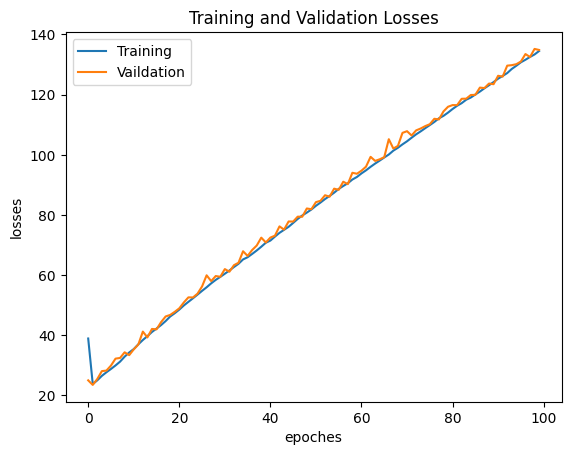

In [ ]:
plt.plot(cnn_results.history['loss'])
plt.plot(cnn_results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

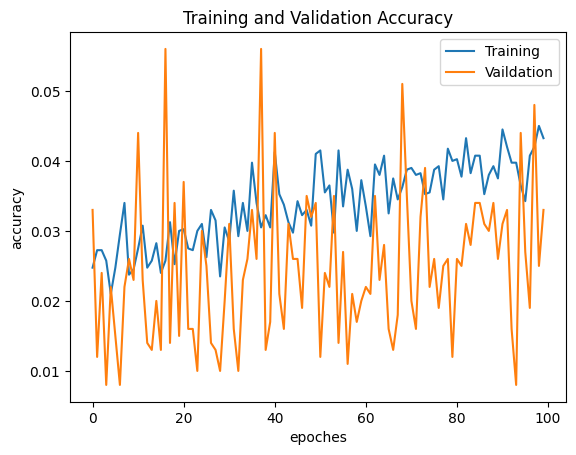

In [ ]:
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [ ]:
cnn_pred=model.predict(X_test_normalized)
cnn_pred[0:3]

32/32 [==============================] - 3s 51ms/step


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.32146727e-04, 0.00000000e+00, 0.00000000e+00, 6.22503634e-04,
        1.29405220e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.02690295e-04, 1.39157695e-03, 0.00000000e+00,
        8.94942496e-05, 0.00000000e+00, 0.00000000e+00, 1.07483165e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.43135355e-02, 1.24132552e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.19669368e-04, 3.23573186e-05, 0.00000000e+00, 0.00000000e+00,
        3.41919031e-06, 8.12294369e-04, 0.00000000e+00, 1.18697397e-02,
        3.59257574e-05, 0.00000000e+00, 1.63397297e-01, 2.11577958e-06,
        3.59564729e-05, 0.00000000e+00, 0.00000000e+00, 3.78742144e-02,
        6.40463375e-04, 6.02100510e-04, 0.00000000e+00, 1.227845

In [ ]:
y_pred=argmax(y_test,axis=1)
y_pred[0:3]

array([0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[ 0 15 17 ... 13 20 11]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
0.0


In [ ]:
np.unique(y_test, return_counts=True)

(array([ 8, 11, 12, 17, 18, 20, 23, 29, 30, 36, 37, 40, 41, 43, 44, 46, 47,
        48, 51, 52, 53, 55, 56, 58, 60, 65, 71, 72, 73, 74, 75, 76, 77, 78,
        80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92], dtype=uint8),
 array([15, 17, 18, 18, 16, 10, 13, 11, 14,  8, 19, 12, 27, 20, 19, 41,  9,
        21, 56, 12, 25, 15, 24, 27, 24, 28, 13, 23, 37, 32, 26, 21, 62, 23,
        15, 33, 24, 16, 13, 14,  9, 36, 40, 13, 20, 11]))

In [ ]:
np.unique(y_train, return_counts=True)

(array([ 8, 11, 12, 17, 18, 20, 23, 29, 30, 36, 37, 40, 41, 43, 44, 46, 47,
        48, 51, 52, 53, 55, 56, 58, 60, 65, 71, 72, 73, 74, 75, 76, 77, 78,
        80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92], dtype=uint8),
 array([ 70,  70,  69,  67,  66,  46,  78,  67,  71,  67,  75,  55, 100,
        110,  74, 155,  39,  50, 202,  73,  68,  56,  85,  87,  85,  74,
         64,  73, 157, 139,  94,  86, 189, 114,  90, 133,  88, 115,  73,
         48,  49, 116, 143,  67,  48,  55]))